   Unnamed: 0               HealthTopic            Bacteria       Drug_Class   
0           0  Antimicrobial resistance  Acinetobacter spp.  Aminoglycosides  \
1           1  Antimicrobial resistance  Acinetobacter spp.  Aminoglycosides   
2           2  Antimicrobial resistance  Acinetobacter spp.  Aminoglycosides   
3           3  Antimicrobial resistance  Acinetobacter spp.  Aminoglycosides   
4           4  Antimicrobial resistance  Acinetobacter spp.  Aminoglycosides   

   Year geo RegionName  Completeness age_%  Completeness gender_%   
0  2012  AT    Austria                 NaN                    NaN  \
1  2012  BE    Belgium                 NaN                    NaN   
2  2012  BG   Bulgaria                 NaN                    NaN   
3  2012  CY     Cyprus                 NaN                    NaN   
4  2012  CZ    Czechia                 NaN                    NaN   

   I - 'susceptible, increased exposure' isolates _N   
0                                               

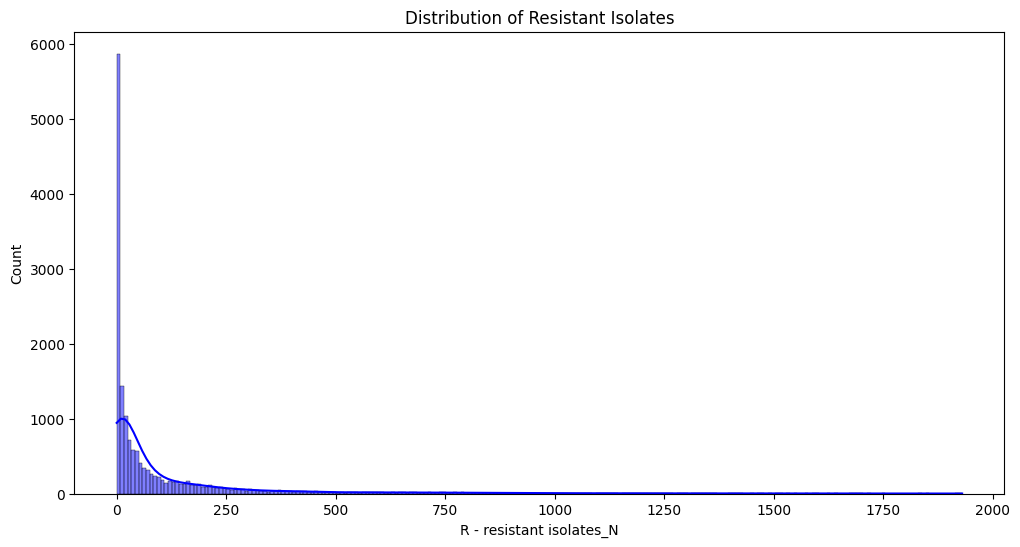

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


# Load the datasets
amr_data = pd.read_csv('final_AMR_data.csv')
gdp_data = pd.read_csv('gdp_data.csv')
health_expenditure = pd.read_csv('health_expenditure.csv')

# Display the first few rows to understand what the data looks like
print(amr_data.head())
print(gdp_data.head())
print(health_expenditure.head())

# General information and summary statistics to identify missing values and data types
print(amr_data.info())
print(amr_data.describe())
print(gdp_data.info())
print(gdp_data.describe())
print(health_expenditure.info())
print(health_expenditure.describe())

# Handling missing values - example using fillna or dropna
amr_data = amr_data.fillna(amr_data.median(numeric_only=True))  # Fill numeric with median
amr_data.dropna(axis=1, how='all', inplace=True)  # Drop columns where all values are NA

# Correcting data types if necessary
amr_data['Year'] = amr_data['Year'].astype(int)
gdp_data['CP_EUR_HAB'] = pd.to_numeric(gdp_data['CP_EUR_HAB'], errors='coerce')

# Identify and remove outliers
from scipy import stats
amr_data = amr_data[(np.abs(stats.zscore(amr_data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Initial Visualization: Distribution of a few key columns
plt.figure(figsize=(12, 6))
sns.histplot(amr_data['R - resistant isolates_N'], kde=True, color='blue')
plt.title('Distribution of Resistant Isolates')
plt.show()


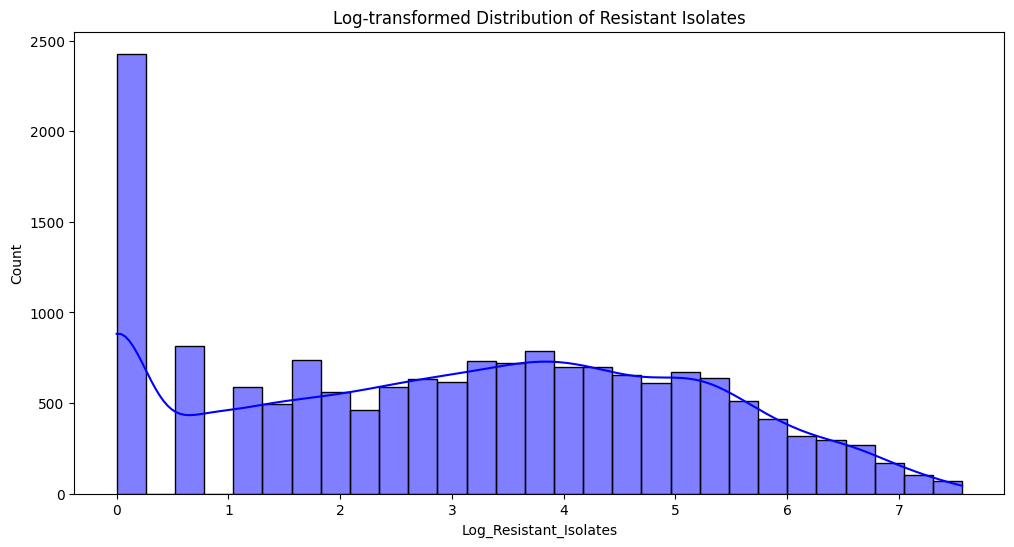

In [2]:
# Log transformation with an offset to avoid log(0)
amr_data['Log_Resistant_Isolates'] = np.log(amr_data['R - resistant isolates_N'] + 1)

# Visualize the log-transformed data
plt.figure(figsize=(12, 6))
sns.histplot(amr_data['Log_Resistant_Isolates'], kde=True, color='blue')
plt.title('Log-transformed Distribution of Resistant Isolates')
plt.show()
